<a href="https://colab.research.google.com/github/shashankbhagat/Hypothesis-Testing-and-Correlation/blob/master/Chi_Squared_Hypothesis_Testing_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(150, 5)
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


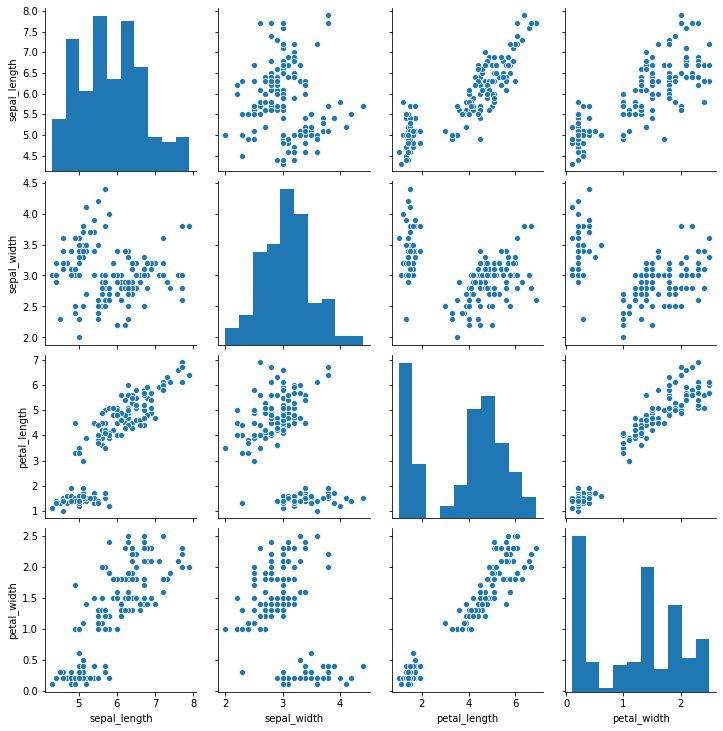

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats

df=sns.load_dataset('iris')
print(df.shape)
print(df.corr())
print(sns.pairplot(df))

In [0]:
stats.chi2_contingency?

Chi-Squared hypothesis Test

In [63]:
dataset=sns.load_dataset('tips')
print(dataset.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [16]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [18]:
observed_value=dataset_table.values
print('Observed values: ',observed_value)

Observed values:  [[60 97]
 [33 54]]


In [23]:
val=stats.chi2_contingency(dataset_table)
val

(0.008763290531773594, 0.925417020494423, 1, array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [24]:
expected_value=val[3]
expected_value

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [36]:
no_rows=len(dataset_table.iloc[:,0])
no_cols=len(dataset_table.iloc[0,:])
dof=(no_rows-1)*(no_cols-1)
print('Degree of Freedom:',dof)
alpha=0.05

Degree of Freedom: 1


In [38]:
chi_square=sum([(o-e)**2./e for o,e in zip(observed_value,expected_value)])
chi_square_statistics=chi_square[0]+chi_square[1]
print('chi-squared statistics: ',chi_square_statistics)

chi-squared statistics:  0.001934818536627623


In [41]:
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical value: ',critical_value)

critical value:  3.841458820694124


In [43]:
p_value=val[1]
print('original hypothesis H0 says that there is no relation between the 2 categorical variables.')
if p_value<=0.05:
    print('Reject H0 and there is a relationship between 2 categorical variables')
else:
    print('Accept H0 and there is no relationship between 2 categorical variables')

original hypothesis H0 says that there is no relation between the 2 categorical variables.
Accept H0 and there is no relationship between 2 categorical variables


In [47]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
pd.concat?

Finding the corelation between all the features in the dataset.

Perform Label Encoding on all categorical features and then concatenating it with the numerical features.

In [73]:
from sklearn.preprocessing import LabelEncoder
dataset=sns.load_dataset('tips')
l_encoder=LabelEncoder()
dataset_cat=dataset.select_dtypes(include=['category'])
#dataset_cat.head()
dataset_cat=dataset_cat.apply(l_encoder.fit_transform)
#print(dataset_cat.head())
dataset=dataset.drop(columns=dataset_cat.columns,inplace=False)
#print(dataset.head())
#print(dataset.shape, dataset_cat.shape)
dataset.reset_index(drop=True, inplace=True)
dataset_cat.reset_index(drop=True, inplace=True)
dataset_encoded=pd.concat([dataset,dataset_cat],axis=1)
print(dataset_encoded.head())
print(dataset_encoded.dtypes)

   total_bill   tip  size  sex  smoker  day  time
0       16.99  1.01     2    0       0    2     0
1       10.34  1.66     3    1       0    2     0
2       21.01  3.50     3    1       0    2     0
3       23.68  3.31     2    1       0    2     0
4       24.59  3.61     4    0       0    2     0
total_bill    float64
tip           float64
size            int64
sex             int64
smoker          int64
day             int64
time            int64
dtype: object


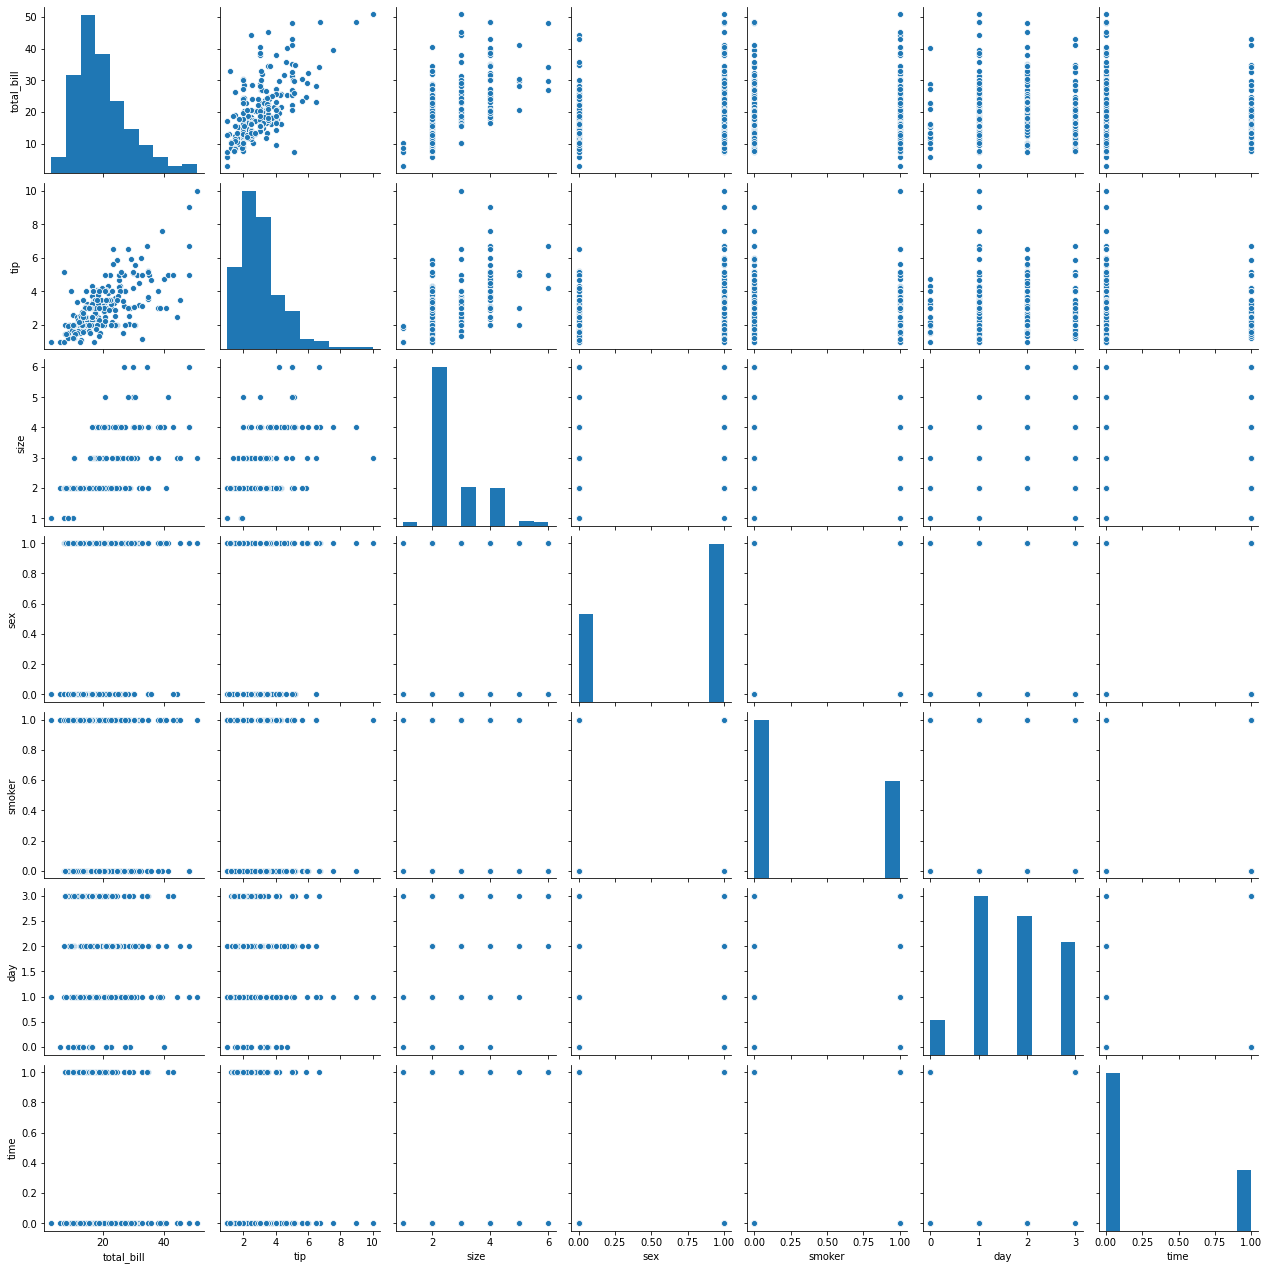

In [76]:
dataset_encoded.corr()
sns.pairplot(dataset_encoded)